In [0]:
import requests
import json

In [0]:
#I chose Alexander Torrenegra because he is the most popular person on the platform. He has a great source of user recommendation data
username = "torrenegra"
#Let's not limit degrees of separation to less than 6 because we want to analyze as much data as possible
limit = 6
#Let's call the API for analyzing profile's connections
url = ("https://torre.bio/api/people/%s/network?[deep=%s]" % (username, limit))
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers = headers)

In [0]:
#Parse the JSON object only filtering the publicId (for filtering use later on) and the weight of the profile's connections
people_by_connection = response.json()["graph"]["nodes"]
all_ids = {}

for people in people_by_connection:
  try:
    all_ids[people["metadata"]["publicId"]] = people["metadata"]["weight"]
  except:
    pass

In [0]:
#Remove extreme outliers considering users with 0 or 20,000 in weight
non_zero_users = { k: all_ids[k] for k,v in all_ids.items() if v >= 2}

scores = list(non_zero_users.values())
scores.remove(max(scores))

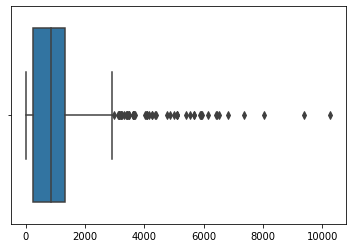

In [229]:
#Visual representation of Q1, average, Q3, min, max
import seaborn as sns
sns.boxplot(scores)
plt.show()

In [230]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
# calculate quartiles
quartiles = percentile(scores, [25, 50, 75, 90, 95, 99])
# calculate min/max
score_min, score_max = min(scores), max(scores)
# print 5-number summary
print('Min: %.3f' % score_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('90 percentile: %.3f' % quartiles[3])
print('95 percentile: %.3f' % quartiles[4])
print('99 percentile: %.3f' % quartiles[5])
print('Max: %.3f' % score_max)

Min: 2.070
Q1: 224.033
Median: 851.047
Q3: 1316.935
90 percentile: 2551.047
95 percentile: 3620.460
99 percentile: 6369.716
Max: 10264.679


In [0]:
userID = list(top500_ids)[2]
url2 = ("https://torre.bio/api/bios/%s" % (userID))
response2 = requests.get(url2, headers=headers)
response2.json().keys()